# Лабораторная работа №3 "Расстояние Махаланобиса"

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
np.random.seed(42)

## Постановка задачи

Имеем 3 множества точек, каждое из которых представляет один из типов результата (Тип 1, Тип 2, Тип 3). 

Необходимо сгенерировать набор точек и классифицировать каждую точку. Принимать решение о принадлежности точки к одному из трех типов будем на основе расстояния Махаланобиса. 

## Определение

Расстояние Махалонобиса -- мера расстояния между векторами случайных величин, обобщающая понятие евклидова расстояния.

Формально, расстояние Махалонобиса от многомерного вектора $x= (x_1, \ldots, x_N)^T$ до множества со средним значением $\mu = (\mu_1, \ldots, \mu_N)^T$ и матрицей ковариации $S$. Определяется следующим образом

$$
D_M (x, \mu) = \sqrt{(x-\mu)^T S^{-1} (x-\mu)}
$$

## Создание 3 множеств точек

По условию, точки Типа 1, Типа 3 распределены равномерно, точки Типа 2 имеют нормальное распределение.

In [58]:
class ABC_Class(ABC):
  
    @abstractmethod
    def generate(self, n):
        """
        сгенерировать множество из n точек класса
        """
        pass

In [59]:
class Uniform_Rectangle_Class(ABC_Class):
    def __init__(self, x_lim, y_lim):
        self.x_lim = np.array(x_lim)
        self.y_lim = np.array(y_lim)

    def generate(self,n):
        x = np.random.rand(n) * (self.x_lim[1] - self.x_lim[0]) + self.x_lim[0]
        y = np.random.rand(n) * (self.y_lim[1] - self.y_lim[0]) + self.y_lim[0]

        return np.array(list(zip(x,y)))

In [60]:
class Normal_Class(ABC_Class):
    def __init__(self,mu, sigma_x, sigma_y):
        """
        mu -- точка
        """
        self.mu = np.array(mu)
        self.sigma_x = sigma_x
        self.sigma_y = sigma_y

    def generate(self,n):
        x = np.random.normal(loc = self.mu[0], scale = self.sigma_x, size =n)
        y = np.random.normal(loc = self.mu[1], scale = self.sigma_y, size =n)

        return np.array(list(zip(x,y)))

Создадим классы, что будут генерировать точки:
- Тип 1. Это равномерное распеделение, его точки лежат внутри $(x,y) \in [3,4) \times [4,5)$;
- Тип 1. Это нормальное распределение, его точки имеют $\mu_x = 1, \sigma_x = 0.1$ по $x$ и $\mu_y = 1, \sigma_y = 0.7$ по $y$;
- Тип 3. Это равномерное распеделение, его точки лежат внутри $(x,y) \in [5,6) \times [0,1)$.

In [61]:
Type1 = Uniform_Rectangle_Class([3,4], [4,5])
Type2 = Normal_Class([1,1], 0.1, 0.7)
Type3 = Uniform_Rectangle_Class([5,6], [0,1])

Теперь создадим для каждого Типа по $N =20$ точек

In [62]:
N = 20
dots1 = Type1.generate(N)
dots2 = Type2.generate(N)
dots3 = Type3.generate(N)

dots_list = [dots1, dots2,dots3]

Подсчитаем средние значения для точек каждого Типа

In [63]:
means = []
for dots in dots_list:
    means.append(np.sum(dots, axis=0)/N)
means = np.array(means)


Text(0.5, 1.0, 'Point types and their means')

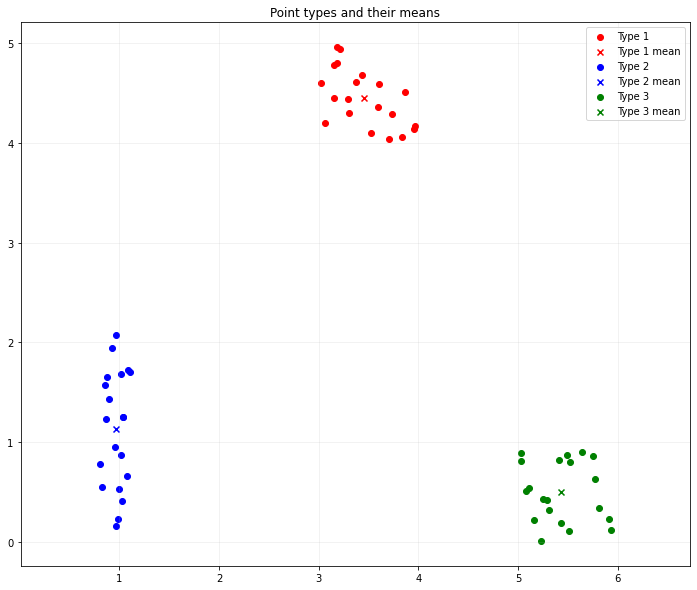

In [64]:
fig = plt.figure(figsize = (12,10))
colors = ['red', 'blue', 'green']
labels = [f'Type {i+1}' for i in range(3)]
for index,dots in enumerate(dots_list):
    plt.scatter(dots.T[0], dots.T[1], c = colors[index], label = labels[index])
    plt.scatter(means[index][0], means[index][1], marker='x', c = colors[index], label = labels[index]+' mean')
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend()
plt.title('Point types and their means')

Поскольку при некоторых точках. Нельзя построить обратную ковариационную матрицу (она сингулярная). То возьмем в качестве ковариацонной матрицы просто единичную. Тогда расстояние Махаланобиса будет просто евклидовым расстоянием.

In [65]:
def D_M(x,mu, dots):
    """
    Mahalanobis distance
    """
    Cov = np.cov(dots.T)
#     Cov = np.eye(2)
    
    return np.sqrt( ((x - mu)[:np.newaxis]).T @ np.linalg.inv(Cov) @ (x- mu) )

Теперь сгененрируем точки, которые мы будем классифицировать. Их будет $M = 100$. Точки расположены внутри прямоугольника $[0,6]\times[0,5]$. Распределены равномерно.

In [66]:
M = 100
x_lim = [0,6]
y_lim = [0,5]

t_x = np.random.rand(M)*(x_lim[1] - x_lim[0]) + x_lim[0]
t_y = np.random.rand(M)*(y_lim[1] - y_lim[0]) + y_lim[0]

test_dots = np.array(list(zip(t_x,t_y)))
print(test_dots.shape)

(100, 2)


Text(0.5, 1.0, 'Test points')

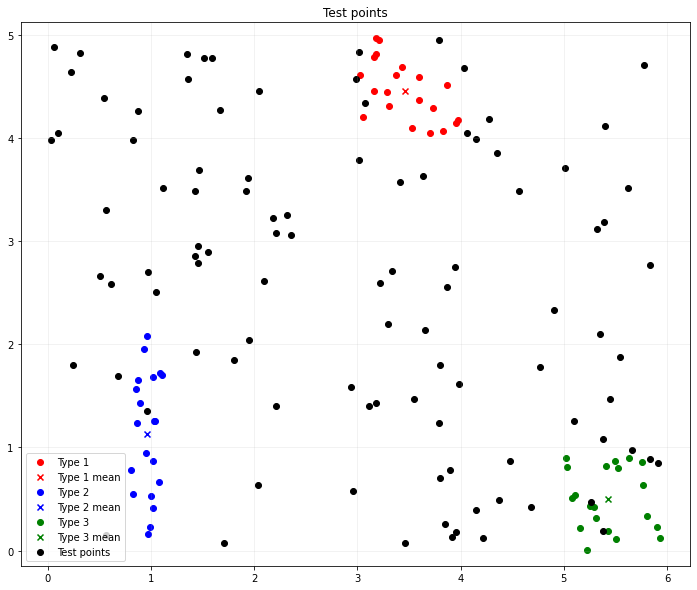

In [67]:
fig = plt.figure(figsize = (12,10))
colors = ['red', 'blue', 'green']
labels = [f'Type {i+1}' for i in range(3)]
for index,dots in enumerate(dots_list):
    plt.scatter(dots.T[0], dots.T[1], c = colors[index], label = labels[index])
    plt.scatter(means[index][0], means[index][1], marker='x', c = colors[index], label = labels[index]+' mean')
plt.scatter(test_dots.T[0], test_dots.T[1], c='black', label = 'Test points')
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend()
plt.title('Test points')

Классифицируем точки

In [68]:

res_points = [[],[],[]]
err_points = []
for tdot in test_dots:
    dist_list =[]

    for i, class_dots in enumerate(dots_list):
        dist_list.append(D_M(tdot, means[i], class_dots))
    min_dist = min(dist_list)

    if dist_list.count(min_dist) >1:
        err_points.append(dot)
        print(f'point : {tdot} has type {[i for i in range(3) if dist_list[i] == min_dist ]}')   
    else:
        index =dist_list.index(min_dist)
        print(f'point : {tdot} has type {index}')
        res_points[index].append(tdot)
for i in range(3):
    res_points[i] = np.array(res_points[i])

point : [5.65745822 0.97621494] has type 2
point : [1.93921759 3.61226058] has type 0
point : [3.11274373 1.40386181] has type 2
point : [4.21811375 0.12157983] has type 2
point : [2.18177761 3.22736148] has type 0
point : [5.8306925 0.8855534] has type 2
point : [5.77468377 4.70229292] has type 0
point : [1.51069377 4.76964289] has type 0
point : [2.98349104 4.57432195] has type 0
point : [1.80526986 1.8507935 ] has type 1
point : [1.70904297 0.07728308] has type 1
point : [0.22132168 4.64159281] has type 1
point : [3.657386   2.14092074] has type 2
point : [3.01607414 4.8332741 ] has type 0
point : [0.30887251 4.81809989] has type 1
point : [1.67187879 4.26504728] has type 0
point : [5.44959532 1.47224446] has type 2
point : [1.43737134 1.92548864] has type 1
point : [0.86936923 4.25568336] has type 1
point : [2.93671656 1.58461003] has type 2
point : [5.91390272 0.84746373] has type 2
point : [1.45233163 2.78400631] has type 1
point : [4.03281328 4.68077387] has type 0
point : [4.56

Text(0.5, 1.0, 'Сlassification')

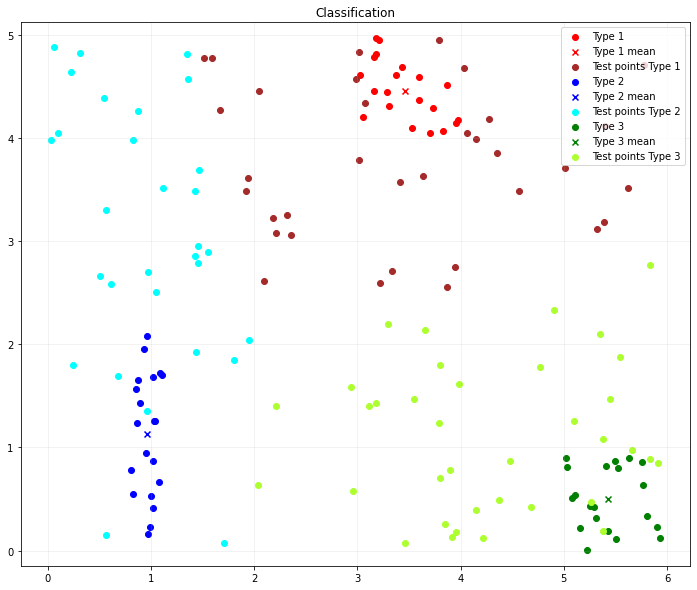

In [69]:
fig = plt.figure(figsize = (12,10))
colors = ['red', 'blue', 'green']
res_colors = ['brown', 'cyan', 'greenyellow']
# res_colors = colors
labels = [f'Type {i+1}' for i in range(3)]
res_labels = [f'Test points Type {i+1}'for i in range(3)]
for index, dots in enumerate(dots_list):
    plt.scatter(dots.T[0], dots.T[1], c = colors[index], label = labels[index])
    plt.scatter(means[index][0], means[index][1], marker='x', c = colors[index], label = labels[index]+' mean')
    plt.scatter(res_points[index].T[0],res_points[index].T[1], c= res_colors[index], label = res_labels[index] )
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend()
plt.title('Сlassification')

In [70]:
def predict(data):
    z = []
    for i in range(len(data)):
        dist_list =[]

        for j,mu in enumerate(means):
            dist_list.append(D_M(data[i], mu, dots_list[j]))
        dist_list = np.array(dist_list)
        z.append(np.argmin(dist_list))
    return np.array(z)

In [71]:
xx, yy = np.meshgrid(np.linspace(*x_lim, 500),np.linspace(*y_lim, 500))

z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)

In [72]:
print(xx.shape, yy.shape, Z.shape)

(500, 500) (500, 500) (500, 500)


<ipython-input-73-30f90ecca227>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


Text(0.5, 1.0, 'Result')

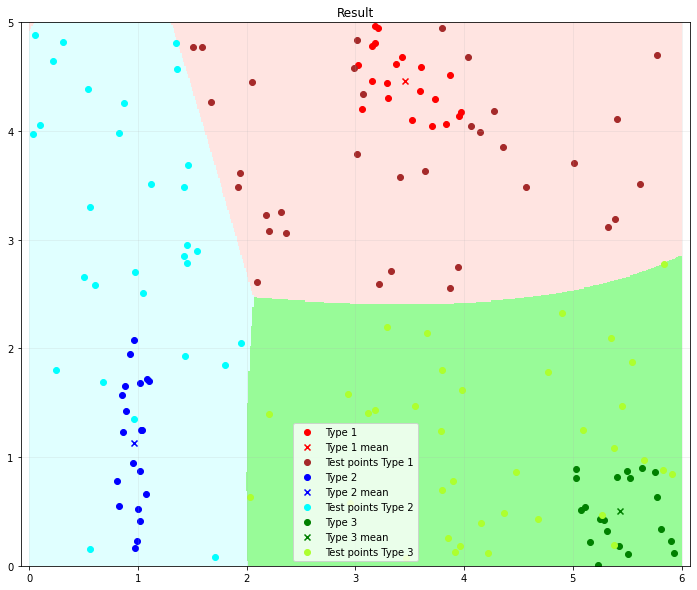

In [73]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
fig = plt.figure(figsize = (12,10))
colors = ['red', 'blue', 'green']
res_colors = ['brown', 'cyan', 'greenyellow']
# res_colors = colors
labels = [f'Type {i+1}' for i in range(3)]
res_labels = [f'Test points Type {i+1}'for i in range(3)]

cmap_light = ListedColormap(['mistyrose', 'lightcyan', 'palegreen'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

for index, dots in enumerate(dots_list):
    plt.scatter(dots.T[0], dots.T[1], c = colors[index], label = labels[index])
    plt.scatter(means[index][0], means[index][1], marker='x', c = colors[index], label = labels[index]+' mean')
    plt.scatter(res_points[index].T[0],res_points[index].T[1], c= res_colors[index], label = res_labels[index] )
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend(loc = 'best')
plt.title('Result')